# Workshop 7

# Please be carefull!
## If you cannot solve the task
- Read the solution carefully line by line
- Make sure you understand what is going on
- If you dont, try to google, aks your group, ask me!
- We are here to learn, if you don't understand the code, what have you learned?


# Remember to give feedback to the Inaugural Project
## If you have an questions regarding giving feedback, or have questions to the feedback i gave - Please ask

# Problem set \#4
- Load data from an API
- Split-Apply-Combine

# Load Data from an API
## Try to read the docs
- This will be usefull if you want to understand the commands
- This is usefull since they often varies
- This is important for your next project.

[Statistics Denmark API docs](https://pydst.readthedocs.io/en/latest/pydst.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Split-Apply-Combine

In [2]:
# From last time
np.random.seed(666) # set seed 
N = np.random.randint(10000) # draw random amount 
log_dist = np.exp(np.random.normal(size=N)) # log distribution = exp ( normal distribution )
group =np.random.randint(low=1, high=3, size=N) # randomly draw 1 and 2 
data = {'group': group, 'income':  log_dist* 5, 'rent': log_dist*2, 'consumption': log_dist* 1.3} # Create dictionary with data
df = pd.DataFrame(data) # turn dictionary to dataframe
df # show the dataframe


,group,income,rent,consumption
0,1,4.273685,1.709474,1.111158
1,1,4.028375,1.611350,1.047377
2,1,7.255236,2.902095,1.886361
3,1,2.879628,1.151851,0.748703
4,2,1.523602,0.609441,0.396136
...,...,...,...,...
6375,1,3.271722,1.308689,0.850648
6376,2,9.415203,3.766081,2.447953
6377,2,20.705526,8.282211,5.383437
6378,1,3.737855,1.495142,0.971842


# Split
- Split The data set into units


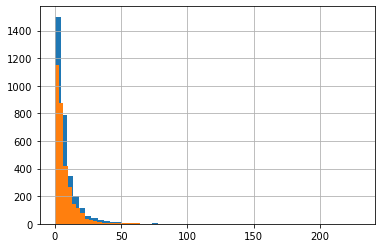

In [3]:
# a. split
data_grouped = df.groupby('group')['income'] # group by group id, and select income
data_grouped.hist(bins=50); # plot histogram of income distribution



# Apply
- Compute max income for each unit

In [4]:
df_max = data_grouped.max() # select max income in each group
df_max.name = 'max income' # necessary for join
df_max


group
1    229.407652
2    160.053779
Name: max income, dtype: float64

# Combine
- Merge this new variable back onto the original dataset

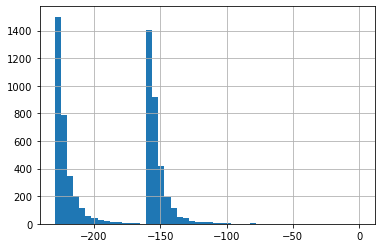

In [5]:
# left join origional dataframe df with the new column with max value by group
df_ = df.set_index('group').join(df_max, how='left')

df_['max diff'] = df_.income - df_['max income'] # new column with difference between income and max income 
df_['max diff'].hist(bins=50); # plot histogram of new measure



# Some usefull resources

- [Python operators](https://www.journaldev.com/14082/python-operators)  How does some operator work?
- [merging guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) How does my final DataFrame look after i combine